In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as pt
import json
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_colwidth', -1)

In [447]:
import pickle
df = pd.read_pickle("projectData/authorExperienceLinesMatrix.p")
df = pd.DataFrame(df, columns=['author', 'commit', 'linesAdded'])
df=df.sort_index(axis=0 ,ascending=False)
df= df.reset_index(drop=True)

In [448]:
commits = df.commit
commits = commits.apply(lambda x: x[:-1])
df.commit = commits
df.linesAdded = df.linesAdded.transform(lambda x:int(x))
df[['linesSum']]= pd.DataFrame(df.groupby('author')['linesAdded'].cumsum())

experienceCommits = df
experienceCommits.head()

,author,commit,linesAdded,linesSum
0,Owen O'Malley,5128a9a453d64bfe1ed978cf9ffed27985eeef36,67543,67543
1,Owen O'Malley,c94ff0f240de583311c1bd73cf41d113ade75ebf,13948,81491
2,Owen O'Malley,abe7be913432053f6d419ea4ca4f9cd2be938bc7,319738,401229
3,Owen O'Malley,cab0a4bf543f58600ae8499f5b219a452f89c827,29719,430948
4,Owen O'Malley,c967cef4d3b82bf05f09ff03ff50243e0a81db26,78824,509772


In [463]:
df = pd.read_pickle("projectData/defectAuthorMatrix.p")
dF = pd.DataFrame(df, columns= ["parentCommit", "file", "lineNumber", "author", "implicated"])

In [464]:
hadoop1000Matrix = pd.read_pickle("projectData/defectAuthorMatrixForHADOOP1000.p")
hadoop1000 = pd.DataFrame(hadoop1000Matrix, columns= ["parentCommit", "file", "lineNumber", "author", "implicated"])

In [465]:
hadoop2000Matrix = pd.read_pickle("projectData/defectAuthorMatrixForHADOOP2000.p")
hadoop2000 = pd.DataFrame(hadoop1000Matrix, columns= ["parentCommit", "file", "lineNumber", "author", "implicated"])

In [466]:
hdfsMatrix = pd.read_pickle("projectData/defectAuthorMatrixForHDFS.p")
hdfs = pd.DataFrame(hdfsMatrix, columns= ["parentCommit", "file", "lineNumber", "author", "implicated"])

In [467]:
hdfs2000Matrix = pd.read_pickle("projectData/defectAuthorMatrixForHDFS2000.p")
hdfs2000 = pd.DataFrame(hdfs2000Matrix, columns= ["parentCommit", "file", "lineNumber", "author", "implicated"])

In [468]:
hdfs1000Matrix = pd.read_pickle("projectData/defectAuthorMatrixForHDFS1000.p")
hdfs1000 = pd.DataFrame(hdfs1000Matrix, columns= ["parentCommit", "file", "lineNumber", "author", "implicated"])

In [469]:
yarnMatrix = pd.read_pickle("projectData/defectAuthorMatrixForYARN.p")
yarn = pd.DataFrame(yarnMatrix, columns= ["parentCommit", "file", "lineNumber", "author", "implicated"])

In [470]:
yarn1000Matrix = pd.read_pickle("projectData/defectAuthorMatrixForYARN1000.p")
yarn1000 = pd.DataFrame(yarn1000Matrix, columns= ["parentCommit", "file", "lineNumber", "author", "implicated"])

In [471]:
mapreduceMatrix = pd.read_pickle("projectData/defectAuthorMatrixForMAPREDUCE.p")
mapreduce = pd.DataFrame(mapreduceMatrix, columns= ["parentCommit", "file", "lineNumber", "author", "implicated"])

In [472]:
mapreduce1000Matrix = pd.read_pickle("projectData/defectAuthorMatrixForMAPREDUCE1000.p")
mapreduce1000 = pd.DataFrame(mapreduce1000Matrix, columns= ["parentCommit", "file", "lineNumber", "author", "implicated"])

In [473]:
dF=pd.concat([dF, hadoop1000, hdfs, hdfs2000, hdfs1000, yarn, yarn1000, mapreduce, mapreduce1000])

In [474]:
dF.tail()

,parentCommit,file,lineNumber,author,implicated
595,504b801ca0e7fd3944872d3214539feb2d614f06,mapreduce/src/test/mapred/org/apache/hadoop/mapred/TestMapRed.java,296,Todd Lipcon,a196766ea07775f18ded69bd9e8d239f8cfd3ccc
596,504b801ca0e7fd3944872d3214539feb2d614f06,mapreduce/src/test/mapred/org/apache/hadoop/mapreduce/security/TestBinaryTokenFile.java,181,Todd Lipcon,a196766ea07775f18ded69bd9e8d239f8cfd3ccc
597,504b801ca0e7fd3944872d3214539feb2d614f06,mapreduce/src/test/mapred/org/apache/hadoop/mapreduce/security/TestTokenCache.java,227,Todd Lipcon,a196766ea07775f18ded69bd9e8d239f8cfd3ccc
598,504b801ca0e7fd3944872d3214539feb2d614f06,mapreduce/src/test/mapred/org/apache/hadoop/mapreduce/security/TestTokenCache.java,230,Todd Lipcon,a196766ea07775f18ded69bd9e8d239f8cfd3ccc
599,504b801ca0e7fd3944872d3214539feb2d614f06,mapreduce/src/test/mapred/org/apache/hadoop/security/TestMapredGroupMappingServiceRefresh.java,111,Todd Lipcon,a196766ea07775f18ded69bd9e8d239f8cfd3ccc


In [477]:
dF=dF.sort_index(axis=0 ,ascending=False)
dF= dF.reset_index(drop=True)
dF.head()

,parentCommit,file,lineNumber,author,implicated
0,12f83b380a9bf55f793cc166f495ff543296e1dc,hadoop-hdfs-project/hadoop-hdfs/src/test/java/org/apache/hadoop/hdfs/server/namenode/TestEditLog.java,295,Todd Lipcon,28e6a4e44a3e920dcaf858f9a74a6358226b3a63
1,12f83b380a9bf55f793cc166f495ff543296e1dc,hadoop-hdfs-project/hadoop-hdfs/src/test/java/org/apache/hadoop/hdfs/server/namenode/TestEditLog.java,291,Todd Lipcon,a196766ea07775f18ded69bd9e8d239f8cfd3ccc
2,12f83b380a9bf55f793cc166f495ff543296e1dc,hadoop-hdfs-project/hadoop-hdfs/src/test/java/org/apache/hadoop/hdfs/server/namenode/TestEditLog.java,278,Todd Lipcon,a196766ea07775f18ded69bd9e8d239f8cfd3ccc
3,12f83b380a9bf55f793cc166f495ff543296e1dc,hadoop-hdfs-project/hadoop-hdfs/src/test/java/org/apache/hadoop/hdfs/server/namenode/TestEditLog.java,130,Todd Lipcon,a196766ea07775f18ded69bd9e8d239f8cfd3ccc
4,12f83b380a9bf55f793cc166f495ff543296e1dc,hadoop-hdfs-project/hadoop-hdfs/src/test/java/org/apache/hadoop/hdfs/server/namenode/TestEditLog.java,129,Todd Lipcon,a196766ea07775f18ded69bd9e8d239f8cfd3ccc


In [478]:
authorImplicatedLines= dF.groupby('author')['implicated'].nunique()
authorImplicatedLines
dF[dF.author =='Aaron T. Myers']

,parentCommit,file,lineNumber,author,implicated
2370,351fac25a994de42ec1b1218513326884a1dde43,hadoop-hdfs-project/hadoop-hdfs/src/test/java/org/apache/hadoop/hdfs/server/datanode/TestDataNodeMetrics.java,32,Aaron T. Myers,3de3640e4c1172f1e47565ac61a1f3183c354c79
7025,085841d9ac7325a19a7db878654d331adae724c3,hadoop-hdfs-project/hadoop-hdfs/src/test/java/org/apache/hadoop/hdfs/server/namenode/snapshot/TestSnapshotFileLength.java,126,Aaron T. Myers,bce3d442ff08ee1e730b0bac112439d6a6931917
7038,085841d9ac7325a19a7db878654d331adae724c3,hadoop-hdfs-project/hadoop-hdfs/src/test/java/org/apache/hadoop/hdfs/server/namenode/snapshot/TestSnapshotFileLength.java,125,Aaron T. Myers,bce3d442ff08ee1e730b0bac112439d6a6931917
7041,085841d9ac7325a19a7db878654d331adae724c3,hadoop-hdfs-project/hadoop-hdfs/src/test/java/org/apache/hadoop/hdfs/server/namenode/snapshot/TestSnapshotFileLength.java,115,Aaron T. Myers,bce3d442ff08ee1e730b0bac112439d6a6931917
7056,085841d9ac7325a19a7db878654d331adae724c3,hadoop-hdfs-project/hadoop-hdfs/src/test/java/org/apache/hadoop/hdfs/server/namenode/snapshot/TestSnapshotFileLength.java,114,Aaron T. Myers,bce3d442ff08ee1e730b0bac112439d6a6931917


In [479]:
implicatedLines= dF.groupby('implicated')['author'].count()
implicatedLines.head()
# implicatedLines[implicatedLines.index == '3de3640e4c1172f1e47565ac61a1f3183c354c79']
# # dF[dF.author=='Aaron T. Myers']
# try:
#     print(implicatedLines[implicatedLines.index=='004068c3911ab2738c8e5d00b49d4b69cd42c603'][0])
# except IndexError:
#     print("no key")

implicated
004068c3911ab2738c8e5d00b49d4b69cd42c603    8 
00a7ebab223f2d3f566c2a431b8fc39eadfb643b    17
016c794e75be975078a5b422e79720bbc1044028    1 
01acf3a3af5727bfdc0a37f9caf4cf8e1be89224    7 
01ecec1cd299aeef60fd6a90fccc6ab48e689237    1 
Name: author, dtype: int64

In [481]:
implicatedList = dF['implicated'].tolist()
print(len(implicatedList))
tempList=[]
commits=experienceCommits['commit'].tolist()
print(len(commits))
for x in commits:
    if x in implicatedList:
        tempList.append([x, True])  
    else:
        tempList.append([x, False])  
        
print(len(tempList))
s=pd.DataFrame(tempList, columns=['commit', 'buggy'])
experienceCommits[['buggy']]=pd.DataFrame(s['buggy'])
experienceCommits['buggy'] = experienceCommits.buggy.astype(int)
# experienceCommits['buggLines']=0 
experienceCommits[experienceCommits['buggy']==1] 

7363
9662
9662


,author,commit,linesAdded,linesSum,buggy
0,Owen O'Malley,5128a9a453d64bfe1ed978cf9ffed27985eeef36,67543,67543,1
6,Giridharan Kesavan,ac670cc47f06b0eb880dcb5522a5aba187b5c67d,13605,13605,1
30,Tsz-wo Sze,a13237975d02b3db913b95845d4b8d6d22f2bac7,98,103,1
90,Christopher Douglas,f95ec3f5bf12bee07c90943cff3b135e6a7e7a8b,30,10937,1
95,Suresh Srinivas,cdbb724edbe093a02d4e2c24523001dcdff0ffd5,387,521,1
149,Suresh Srinivas,3f371a0a644181b204111ee4e12c995fc7b5e5f5,2381,8137,1
168,Konstantin Boudnik,929e91a08c5387c692ed3257361190b83d72f2e9,31,561,1
189,Boris Shkolnik,ae93ba7501d95e9d26a29de25f4cc39e5225ca20,425,425,1
190,Devaraj Das,fe479755c39b8259e0564de7a35389721351c76b,384,812,1
219,Hairong Kuang,d6f4cf3dfec03867f02bf71aa900a77676651c2a,4,227,1


In [482]:
tempList=[]
for x in commits:
    try:
        tempList.append(implicatedLines[implicatedLines.index==x][0])
    except IndexError:
        tempList.append(0)

In [483]:
tempList
s=pd.DataFrame(tempList, columns=['buggyLines'])
experienceCommits[['buggyLines']]=pd.DataFrame(s['buggyLines'])
experienceCommits[experienceCommits.author =='Aaron T. Myers']

experienceCommits[['buggyLinesSum']]= pd.DataFrame(experienceCommits.groupby('author')['buggyLines'].cumsum())
experienceCommits[experienceCommits.author =='Aaron T. Myers']
        

,author,commit,linesAdded,linesSum,buggy,buggyLines,buggyLinesSum
6998,Aaron T. Myers,135315b66fba5d248a983ad5d05d7ab7da42b5fb,245,245,0,0,0
7109,Aaron T. Myers,a0c54aeb00c0bc38f7dfa3615ce6866023d1ef74,2550,2795,0,0,0
7159,Aaron T. Myers,71e6a4a735222c25bd0be7f6811863613ece3114,4,2799,0,0,0
7351,Aaron T. Myers,afaadd65359ba54be38a118bfb5dcf4174416a27,52,2851,0,0,0
7365,Aaron T. Myers,8cbacb37e9d4aa1a7dcc87a7aef7915ef72a1be6,10,2861,0,0,0
7392,Aaron T. Myers,f3132eee1011b750158169c099b26ce8f6e2d1f4,155,3016,0,0,0
7638,Aaron T. Myers,9082fe4e206692695ae877d27c19cac87f6481dc,1262,4278,0,0,0
7639,Aaron T. Myers,e96f0c6aae7dffc2079ffd6ff863433e96724670,142,4420,0,0,0
7641,Aaron T. Myers,d698ed1d6f641a7377c1600ebe7a33757936a2b1,49,4469,0,0,0
7743,Aaron T. Myers,d35eba7b1ff98e2e542a6c6c5b389fcc20d885c7,331,4800,0,0,0


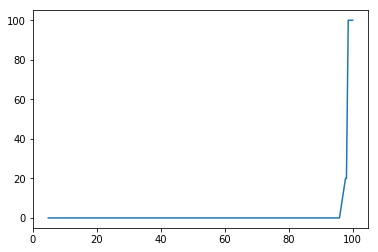

In [484]:
currentMatrix = experienceCommits[experienceCommits.author =='Aaron T. Myers']
maxLineSum = currentMatrix.linesSum.max()
maxLineSum
xSeries = currentMatrix.linesSum*100/maxLineSum
xSeries

maxBuggySum = currentMatrix.buggyLinesSum.max()
maxBuggySum
ySeries = currentMatrix.buggyLinesSum*100/maxBuggySum
ySeries


pt.plot(xSeries, ySeries)

In [497]:
data= dF.groupby('author')['implicated'].nunique()
authorDf = pd.DataFrame(data)
topBugyContributers= authorDf.implicated.nlargest(10)

Text(0.5, 1.0, 'author with most bugs, bugs/exp')

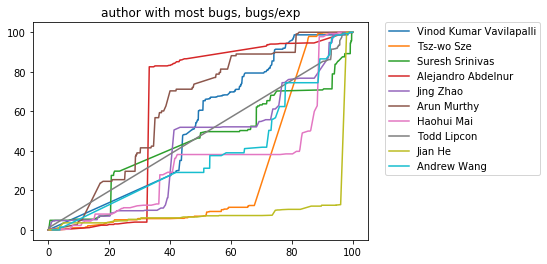

In [503]:

tempBuggy=[]
for author in topBugyContributers.index:
    currentMatrix = experienceCommits[experienceCommits.author ==author]
    maxLineSum = currentMatrix.linesSum.max()
    maxLineSum
    xSeries = currentMatrix.linesSum*100/maxLineSum
    

    maxBuggySum = currentMatrix.buggyLinesSum.max()
    maxBuggySum
    ySeries = currentMatrix.buggyLinesSum*100/maxBuggySum
    
    
    pt.plot(xSeries, ySeries, label= str(author))
    pt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

pt.title("author with most bugs, bugs/exp")
# Not plotting the non buggy commits, only the buggy commits, which is why this is a smooth curve. 
# I am filtering the experience matrix first based on the buggyiness. 

Text(0.5, 1.0, 'author with most bugs, bugs vs experience')

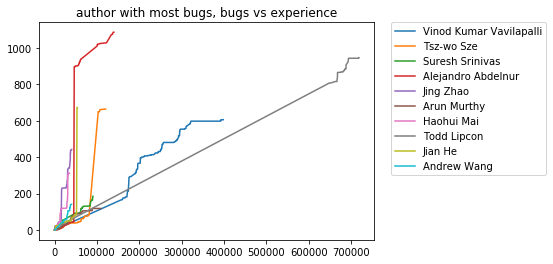

In [504]:
for author in topBugyContributers.index:
    currentMatrix = experienceCommits[experienceCommits.author ==author]
    maxLineSum = currentMatrix.linesSum.max()
    maxLineSum
    xSeries= currentMatrix.linesSum

    maxBuggySum = currentMatrix.buggyLinesSum.max()
    maxBuggySum
    ySeries=currentMatrix.buggyLinesSum
    
    pt.plot(xSeries, ySeries, label= str(author))
    pt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
pt.title("author with most bugs, bugs vs experience")

In [505]:
topContributors= experienceCommits.groupby('author')['commit']
topContributors=topContributors.nunique().nlargest(5)
topContributors
# topContributors.columns=['somethingelse']
# topContributors
# tempBuggy= dF.loc[dF['author'].isin(topContributors.index)]
# tempBuggy.groupby('author')['implicated'].nunique().nsmallest(2)


author
Vinod Kumar Vavilapalli    752
Tsz-wo Sze                 530
Alejandro Abdelnur         426
Eli Collins                394
Arun Murthy                380
Name: commit, dtype: int64

Text(0.5, 1.0, 'author with most experience and their bug percentage')

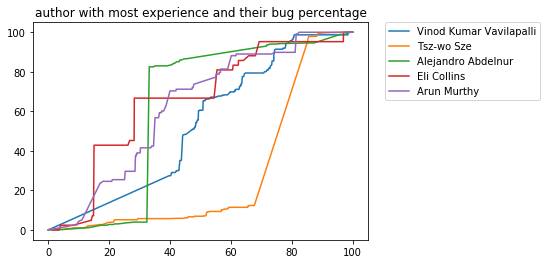

In [506]:

for author in topContributors.index:
    currentMatrix = experienceCommits[experienceCommits.author ==author]
    maxLineSum = currentMatrix.linesSum.max()
    maxLineSum
    xSeries = currentMatrix.linesSum*100/maxLineSum
    xSeries

    maxBuggySum = currentMatrix.buggyLinesSum.max()
    maxBuggySum
    ySeries = currentMatrix.buggyLinesSum*100/maxBuggySum
    ySeries
    
    pt.plot(xSeries, ySeries, label= str(author))
    pt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
pt.title("author with most experience and their bug percentage")

In [507]:
topContributors= experienceCommits.groupby('author')['commit']
topContributors=topContributors.nunique().nlargest(10)
topContributors.columns=['somethingelse']
topContributors
tempBuggy= dF.loc[dF['author'].isin(topContributors.index)]
bottomBuggyContributor = tempBuggy.groupby('author')['implicated'].nunique().nsmallest(5)
bottomBuggyContributor

author
Robert Joseph Evans    10
Aaron Myers            11
Eli Collins            12
Todd Lipcon            23
Haohui Mai             28
Name: implicated, dtype: int64

Text(0.5, 1.0, 'author with most experience and least bugs and their bug percentage')

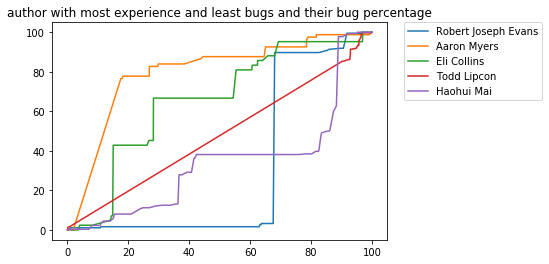

In [509]:
for author in bottomBuggyContributor.index:
    currentMatrix = experienceCommits[experienceCommits.author ==author]
    maxLineSum = currentMatrix.linesSum.max()
    maxLineSum
    xSeries = currentMatrix.linesSum*100/maxLineSum
    xSeries

    maxBuggySum = currentMatrix.buggyLinesSum.max()
    maxBuggySum
    ySeries = currentMatrix.buggyLinesSum*100/maxBuggySum
    ySeries
    
    pt.plot(xSeries, ySeries, label= str(author))
    pt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
pt.title("author with most experience and least bugs and their bug percentage")

In [510]:
data= dF.groupby('author')['implicated'].nunique()
authorDf = pd.DataFrame(data)
bottomBugyContributers= authorDf.implicated.nsmallest(5)

Text(0.5, 1.0, 'author with most experience and least bugs and their bug percentage')

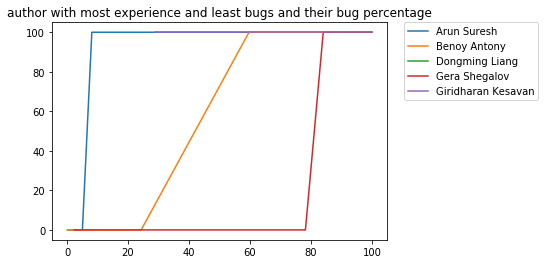

In [511]:
for author in bottomBugyContributers.index:
    currentMatrix = experienceCommits[experienceCommits.author ==author]
    maxLineSum = currentMatrix.linesSum.max()
    maxLineSum
    xSeries = currentMatrix.linesSum*100/maxLineSum
    xSeries

    maxBuggySum = currentMatrix.buggyLinesSum.max()
    maxBuggySum
    ySeries = currentMatrix.buggyLinesSum*100/maxBuggySum
    ySeries
    
    pt.plot(xSeries, ySeries, label= str(author))
    pt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
pt.title("author with most experience and least bugs and their bug percentage")